# EXERCICE 3 SVM

# importation des librairies et du dataset load_iris

In [7]:
# importation des librairies 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import sklearn.metrics as sm
from sklearn  import datasets

# Chargement des données

In [21]:
# Chargement des données
iris = datasets.load_iris()

print(iris)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# transformation du dataset en dataframe

In [22]:
x=pd.DataFrame(iris.data)
# définir les noms de colonnes
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

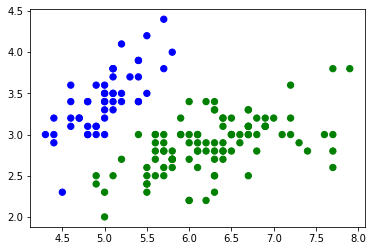

In [23]:
new_target =  np.where(iris.target<1, 0, 1)
colormap =np.array(['BLUE','GREEN','CYAN'])
plt.scatter(x.Sepal_Length, x.Sepal_width,c=colormap[new_target],s=40)

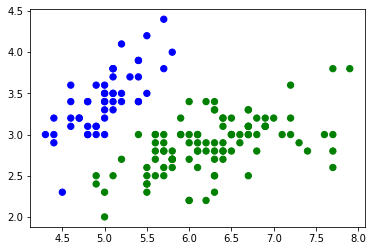

In [24]:
new_data = x[['Sepal_Length','Sepal_width']]
plt.scatter(new_data.Sepal_Length, new_data.Sepal_width,
            c=colormap[new_target],s=40)

In [25]:
svm = SVC(C=1)
svm.fit(new_data, new_target)
svm.support_vectors_

array([[4.9, 3. ],
       [4.9, 3.1],
       [4.8, 3. ],
       [5.8, 4. ],
       [5.7, 3.8],
       [5.4, 3.4],
       [5.1, 3.3],
       [5. , 3. ],
       [5.2, 3.4],
       [5.4, 3.4],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.5, 2.3],
       [4.8, 3. ],
       [4.9, 2.4],
       [5.2, 2.7],
       [5.6, 2.9],
       [5.6, 3. ],
       [5.9, 3.2],
       [5.4, 3. ],
       [6. , 3.4],
       [5.6, 3. ],
       [5. , 2.3],
       [5.7, 3. ],
       [5.7, 2.9],
       [5.1, 2.5],
       [4.9, 2.5],
       [5.6, 2.8],
       [7.9, 3.8],
       [6.2, 3.4]])

In [26]:
# on imprime le score pour voir 
svm.score(new_data, new_target)

1.0

In [27]:
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(new_data, new_target, test_size=0.5)

Text(0.5, 1.0, 'SVC')

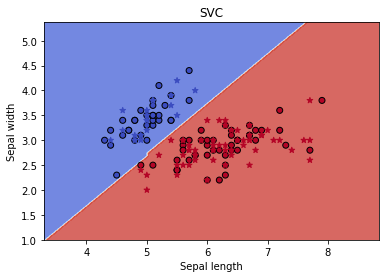

In [28]:
# Créer la surface de décision discretisée
x_min, x_max = new_data.iloc[:, 0].min() - 1, new_data.iloc[:, 0].max() + 1
y_min, y_max = new_data.iloc[:, 1].min() - 1, new_data.iloc[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVC")

# CLASSIFICATION

Dans scikit-learn, la classe sklearn.tree.DecisionTreeClassifier permet de réaliser une classification multi-classe à l’aide d’un arbre de décision.

On commence par importer les bons modules et construire l’objet arbre

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

nous prenons seulement 5% de la base comme échantillon d’apprentissage (sinon, on risque de ne rien voir quand on modifie les paramètres).

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, new_target, train_size=0.95, random_state=0)

Nous pouvons désormais construire un arbre de décision sur ces données :

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre, soit avec matplotlib en passant par la méthode plot_tree, soit avec l’outil graphviz (commande dot). Par exemple, avec matplotlib :

[Text(181.35000000000002, 195.696, 'X[0] <= 5.45\ngini = 0.443\nsamples = 142\nvalue = [47, 95]'),
 Text(111.60000000000001, 152.208, 'X[1] <= 2.8\ngini = 0.241\nsamples = 50\nvalue = [43, 7]'),
 Text(55.800000000000004, 108.72, 'X[0] <= 4.7\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(27.900000000000002, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(83.7, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(167.4, 108.72, 'X[0] <= 5.35\ngini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(139.5, 65.232, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(195.3, 65.232, 'X[1] <= 3.2\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 152.208, 'X[1] <= 3.45\ngini = 0.083\nsamples = 92\nvalue = [4, 88]'),
 Text(223.20000000000002, 108.72, 'gini = 0.0\nsamples = 85\nvalue = [0, 85]'),
 Text(279.0, 108.72,

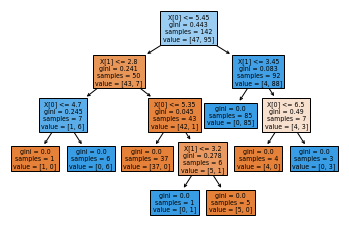

In [34]:
tree.plot_tree(clf, filled=True)

# Pour chercher de bonnes valeurs pour les paramètres on peut utiliser la validation croisée avec GridSearchCV 

In [20]:
from sklearn import tree
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,test_size=0.5, random_state=0)
from sklearn.model_selection import GridSearchCV
# nous prenons seulement 50% de la base comme échantillon d’apprentissage 
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 10],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.96

# le C OPTIMAL EST: 0.96